# Model Training Module

Now that we have our cleaned dataset, we can finally start training our models to predict real estate price.

Importing important libraries


In [712]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import specified linear algorithms
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import specified ensemble algorithms 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [713]:
df = pd.read_csv('training_data.csv')
df.drop_duplicates()
df = df.drop(df.columns[0], axis=1)
df = df.drop(columns= ['хаяг'])
df.columns = df.columns.str.replace('_', '-')
df.columns = df.columns.str.replace(':', '')
df.columns = df.columns.str.replace('—', '')
df.head()


,үнэ,Тагт,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Лизингээр авах боломж,Цонхны тоо,Барилгын явц,Нас,floor-ratio,Цонх-Бусад,Цонх-Вакум,Дүүрэг-УБ Багануур,Дүүрэг-УБ Баянгол,Дүүрэг-УБ Баянзүрх,Дүүрэг-УБ Налайх,Дүүрэг-УБ Сонгинохайрхан,Дүүрэг-УБ Сүхбаатар,Дүүрэг-УБ Хан-Уул,Дүүрэг-УБ Чингэлтэй,Хаалга-Бусад,Хаалга-Бүргэд,Хаалга-Төмөр,Шал-Бусад,Шал-Паркет,Category-High,Category-Low,Category-Medium
0,84.000,0,0,5,30.500,5,0,2,1,11,1.000,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False
1,115.000,1,0,5,16.000,5,0,2,1,34,1.000,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True
2,510.000,1,0,10,150.000,10,0,5,1,14,1.000,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False
3,107.946,0,0,12,39.980,2,0,2,1,3,0.167,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False
4,521.370,2,1,16,115.860,7,0,5,1,8,0.438,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False


In [714]:
df.columns

Index(['үнэ', 'Тагт', 'Гараж', 'Барилгын давхар', 'Талбай', 'Хэдэн давхарт',
       'Лизингээр авах боломж', 'Цонхны тоо', 'Барилгын явц', 'Нас',
       'floor-ratio', 'Цонх-Бусад', 'Цонх-Вакум', 'Дүүрэг-УБ  Багануур',
       'Дүүрэг-УБ  Баянгол', 'Дүүрэг-УБ  Баянзүрх', 'Дүүрэг-УБ  Налайх',
       'Дүүрэг-УБ  Сонгинохайрхан', 'Дүүрэг-УБ  Сүхбаатар',
       'Дүүрэг-УБ  Хан-Уул', 'Дүүрэг-УБ  Чингэлтэй', 'Хаалга-Бусад',
       'Хаалга-Бүргэд', 'Хаалга-Төмөр', 'Шал-Бусад', 'Шал-Паркет',
       'Category-High', 'Category-Low', 'Category-Medium'],
      dtype='object')

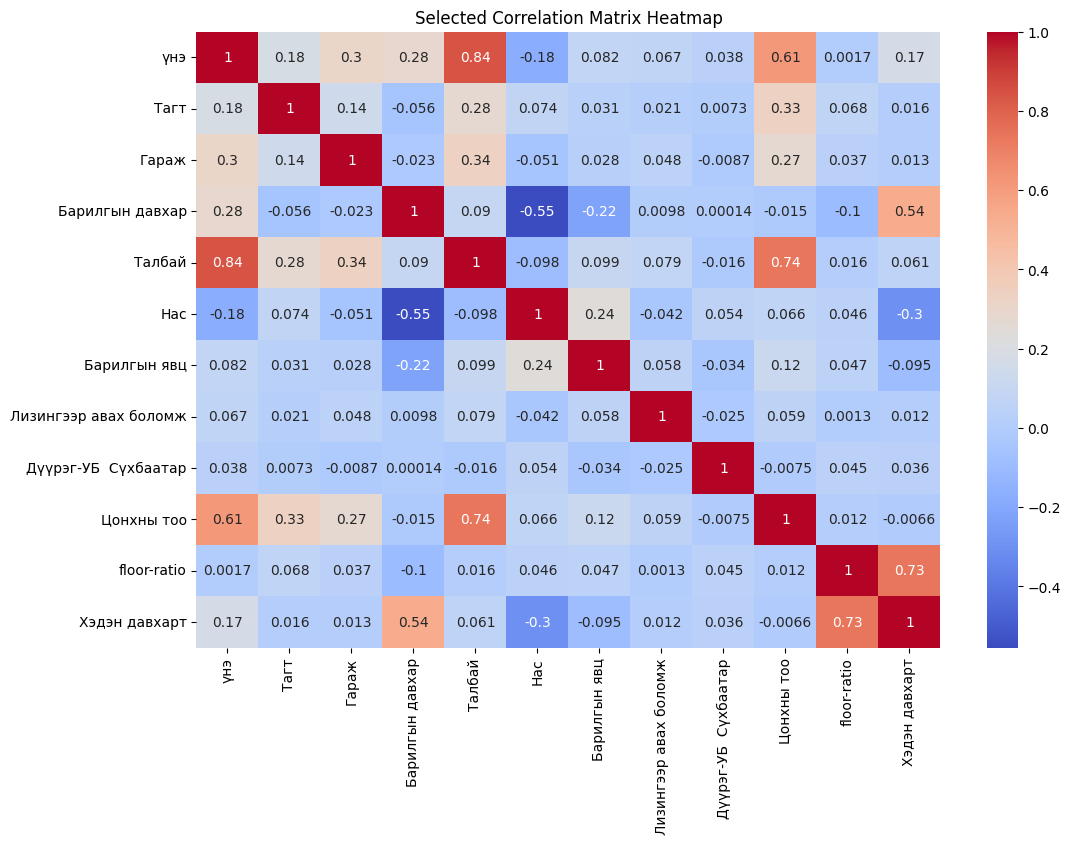

In [715]:
correlation_matrix = df.corr()

# Select specific columns and rows for the heatmap
selected_columns = ['үнэ', 'Тагт', 'Гараж', 'Барилгын давхар', 'Талбай', 'Нас', 'Барилгын явц', 'Лизингээр авах боломж', 'Дүүрэг-УБ  Сүхбаатар', 'Цонхны тоо', 'floor-ratio', 'Хэдэн давхарт']
correlation_matrix_selected = correlation_matrix.loc[selected_columns, selected_columns]

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Selected Correlation Matrix Heatmap')
plt.show()

In [716]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your dataframe and it contains only numerical features

# If your dataframe has both numerical and categorical variables, you need to separate them first and only use the numerical ones.
numerical_features = df.select_dtypes(include=[np.number])
numerical_features = numerical_features.drop(columns = ['үнэ'])
numerical_features = numerical_features.drop(columns = ['floor-ratio'])


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

print(vif_data)


                 Feature    VIF
0                   Тагт  6.083
1                  Гараж  1.409
2        Барилгын давхар 10.097
3                 Талбай 14.967
4          Хэдэн давхарт  4.943
5  Лизингээр авах боломж  1.429
6             Цонхны тоо 17.479
7           Барилгын явц  9.457
8                    Нас  2.291


# Split Dataset for training and testing.

In [717]:
df['үнэ'].describe()

count   5132.000
mean     297.673
std      183.124
min       45.000
25%      160.000
50%      235.000
75%      390.500
max      880.000
Name: үнэ, dtype: float64

In [718]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import lightgbm as lgb
import catboost as cb


In [719]:
# object for our target variable

y = df['үнэ']

# seperate object for our input features

X = df.drop('үнэ', axis=1)

In [720]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# verify length of each set
len(X_train), len(X_test), len(y_train), len(y_test)

(4105, 1027, 4105, 1027)

# Model Pipeline


In [721]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [722]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

### Linear Regression

In [723]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred_lr = linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Mean Absolute Error =  62.13545685036033
Training Accuracy =  0.8048806631121675
Test Accuracy     =  0.7888490937114238


### Decision Tree Regressor

In [724]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 123)
dt.fit(X_train, y_train)
y_pred_dt= dt.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Mean Absolute Error =  41.95878703213243
Training Accuracy =  0.9998766954784357
Test Accuracy     =  0.8269535939096958


### Random Forest Regressor

In [725]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 12)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Mean Absolute Error =  34.193453365739316
Training Accuracy =  0.9868430582456592
Test Accuracy     =  0.9082937842324027


### Default Gradient Boosting 

In [726]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# Evaluate the performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R squared value: ', r2)


Mean Absolute Error: 46.05713924280823
Mean Squared Error: 4937.15588258402
Root Mean Squared Error: 70.26489794046542
R squared value:  0.8589440077558832


In [727]:
import shap


explainer = shap.TreeExplainer(gb)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

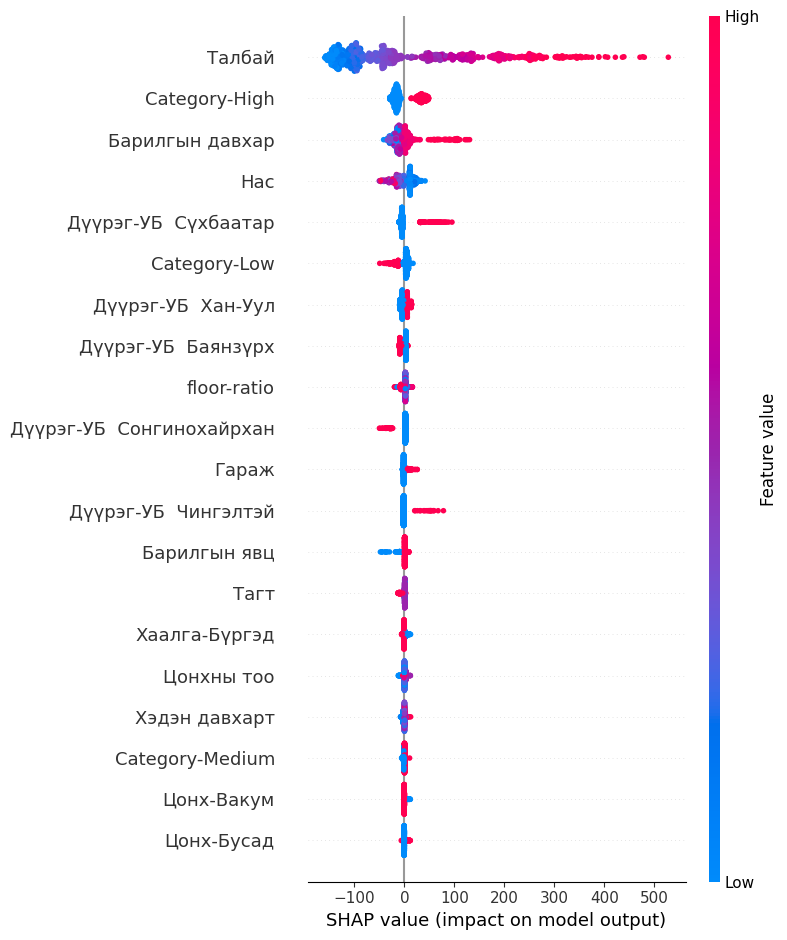

In [728]:
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names = X.columns)

In [729]:
# lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200]
}   

# ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200]
}

# elastic net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [200, 400],
    'randomforestregressor__max_features' : [None, 'sqrt', 0.33]
}

# gradient boost hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [400, 500, 600],
    'gradientboostingregressor__learning_rate' : [0.1, 0.2, 1],
    'gradientboostingregressor__max_depth' : [4, 6, 8],
}

In [730]:
hyperparameters = {
    'rf' : rf_hyperparameters, 
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
}

In [731]:
from sklearn.model_selection import GridSearchCV

In [732]:
fitted_models = {}

for name, pipeline in pipelines.items():
    # create cross-validation object 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1, error_score='raise')

    # fite model on X_train, y_train
    model.fit(X_train, y_train)
    
    # store model in dictionary
    fitted_models[name] = model

    # print message after model has been fitted
    print(name, 'has been fitted.')

/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+04, tolerance: 1.228e+04
  model = cd_fast.enet_coordinate_descent(
/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.279e+04, tolerance: 1.230e+04
  model = cd_fast.enet_coordinate_descent(
/Users/brsbold/Documents/And Global Intern/First Task GIt Clone/TestProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: Con

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [733]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [734]:
# display the average R^2 score for each model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.8002196518090704
ridge 0.8001213741671537
enet 0.8001817899650445
rf 0.9041269725064522
gb 0.9088128599599571


In [735]:
from sklearn.metrics import r2_score

In [736]:
from sklearn.metrics import mean_absolute_error

In [737]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('--------')
    print('R^2:', r2_score(y_test, pred))
    range_of_target = np.max(y_test) - np.min(y_test)
    relative_mae = mean_absolute_error(y_test,pred) / range_of_target
    print('MAE:', mean_absolute_error(y_test, pred))
    print('Relative MAE:', relative_mae)

lasso
--------
R^2: 0.7889064045282331
MAE: 62.08393470133686
Relative MAE: 0.07617660699550535
ridge
--------
R^2: 0.7893383349100649
MAE: 62.078828692043004
Relative MAE: 0.07617034195342699
enet
--------
R^2: 0.789755549584366
MAE: 62.0104889963803
Relative MAE: 0.0760864895661108
rf
--------
R^2: 0.9072594684309395
MAE: 34.49413686561348
Relative MAE: 0.042324094313636165
gb
--------
R^2: 0.9176031416234955
MAE: 32.62026253008734
Relative MAE: 0.040024862000107166


*So far Gradient Boosting is the best model. So let's see residuals distribution and also prediction and test correlation.*

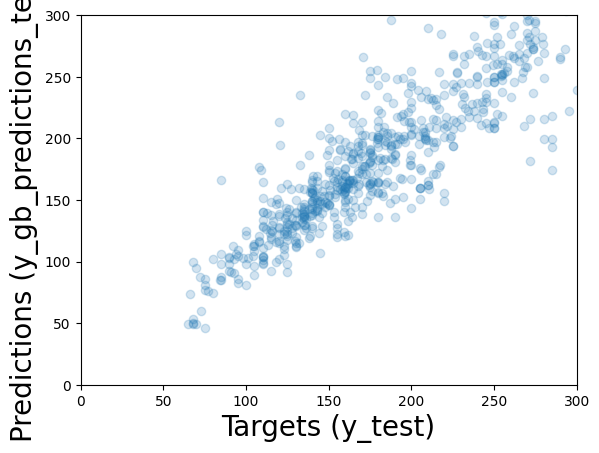

In [738]:
gbmodel = None
for name, model in fitted_models.items():
    if name == 'gb':
        gbmodel = model
        break
pred = gbmodel.predict(X_test)
plt.scatter(y_test, pred, alpha=0.2)
plt.xlabel('Targets (y_test)', size=20)
plt.ylabel('Predictions (y_gb_predictions_test)', size=20)
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

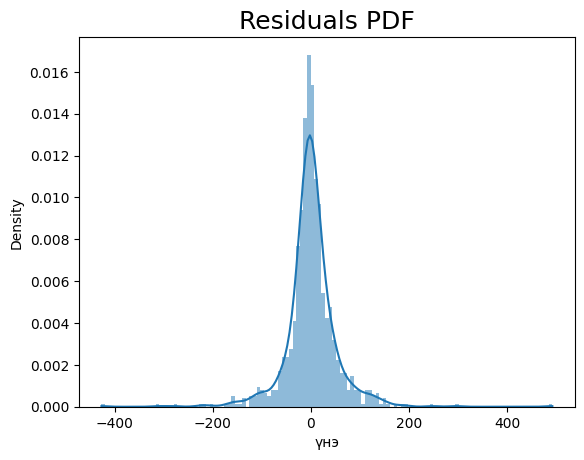

In [739]:
sns.histplot(y_test - pred, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [740]:
df_pf = pd.DataFrame(pred, columns=['Prediction'])

y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop = True)

df_pf['Target'] = y_test

df_pf['Residual'] =df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
cdf_pf = pd.concat([df_pf, X_test], axis=1)
cdf_pf




,Prediction,Target,Residual,Difference%,Тагт,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Лизингээр авах боломж,Цонхны тоо,Барилгын явц,Нас,floor-ratio,Цонх-Бусад,Цонх-Вакум,Дүүрэг-УБ Багануур,Дүүрэг-УБ Баянгол,Дүүрэг-УБ Баянзүрх,Дүүрэг-УБ Налайх,Дүүрэг-УБ Сонгинохайрхан,Дүүрэг-УБ Сүхбаатар,Дүүрэг-УБ Хан-Уул,Дүүрэг-УБ Чингэлтэй,Хаалга-Бусад,Хаалга-Бүргэд,Хаалга-Төмөр,Шал-Бусад,Шал-Паркет,Category-High,Category-Low,Category-Medium
0,370.636,380.000,9.364,2.464,1,0,16,73.150,8,0,3,1,3,0.500,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False
1,652.426,696.000,43.574,6.261,1,1,16,120.000,14,0,7,1,7,0.875,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True
2,579.313,630.000,50.687,8.046,1,1,7,103.000,7,0,6,1,8,1.000,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False
3,169.315,160.000,-9.315,5.822,1,0,16,49.650,6,0,3,1,0,0.375,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True
4,162.699,184.000,21.301,11.577,1,0,12,49.600,8,1,2,1,6,0.667,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,146.526,135.000,-11.526,8.538,1,0,12,43.300,11,0,3,1,10,0.917,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True
1023,422.704,416.500,-6.204,1.490,1,0,18,83.300,18,1,4,1,3,1.000,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False
1024,164.363,110.000,-54.363,49.421,1,0,5,54.000,4,1,3,1,22,0.800,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False
1025,190.508,150.000,-40.508,27.005,1,0,6,60.000,6,0,3,1,22,1.000,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False


In [741]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1027.000,1027.000,1027.000,1027.000
mean,296.760,297.707,0.947,11.988
std,179.887,187.178,53.721,14.068
min,45.874,65.000,-426.665,0.002
25%,160.712,160.000,-17.820,3.238
50%,231.977,230.000,-0.642,7.997
75%,389.147,390.000,19.368,16.087
max,853.599,880.000,492.222,177.777


In [742]:
cdf_pf[(cdf_pf['Difference%']) > 50]


,Prediction,Target,Residual,Difference%,Тагт,Гараж,Барилгын давхар,Талбай,Хэдэн давхарт,Лизингээр авах боломж,Цонхны тоо,Барилгын явц,Нас,floor-ratio,Цонх-Бусад,Цонх-Вакум,Дүүрэг-УБ Багануур,Дүүрэг-УБ Баянгол,Дүүрэг-УБ Баянзүрх,Дүүрэг-УБ Налайх,Дүүрэг-УБ Сонгинохайрхан,Дүүрэг-УБ Сүхбаатар,Дүүрэг-УБ Хан-Уул,Дүүрэг-УБ Чингэлтэй,Хаалга-Бусад,Хаалга-Бүргэд,Хаалга-Төмөр,Шал-Бусад,Шал-Паркет,Category-High,Category-Low,Category-Medium
31,371.907,169.000,-202.907,120.063,1,0,23,65.000,3,0,4,1,0,0.130,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False
61,166.478,85.000,-81.478,95.856,1,0,5,18.000,2,0,4,1,22,0.400,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True
82,590.111,368.000,-222.111,60.356,1,0,12,115.000,8,0,5,1,4,0.667,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True
234,337.284,222.270,-115.014,51.745,1,0,20,71.700,5,0,5,1,1,0.250,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False
396,666.665,240.000,-426.665,177.777,0,1,3,198.000,1,1,5,1,16,0.333,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True
541,174.165,109.200,-64.965,59.492,1,0,16,52.000,7,0,2,0,0,0.438,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True
579,315.143,199.000,-116.143,58.363,1,0,12,60.180,4,1,4,1,0,0.333,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True
613,265.982,170.784,-95.198,55.742,1,0,7,53.370,3,0,2,0,0,0.429,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False
627,145.618,637.840,492.222,77.170,1,0,16,45.560,2,1,2,1,1,0.125,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
642,295.988,188.000,-107.988,57.441,1,0,17,73.000,13,0,2,1,10,0.765,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True


## LGBM Regressor

In [748]:
from sklearn.model_selection import RandomizedSearchCV

lgbm = LGBMRegressor(learning_rate=0.12, max_depth=12, n_estimators=400,
              num_leaves=100, random_state=123, subsample=0.5)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 4105, number of used features: 26
[LightGBM] [Info] Start training from score 297.664319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMRegressor(learning_rate=0.12, max_depth=12, n_estimators=400,
              num_leaves=100, random_state=123, subsample=0.5)

In [749]:
y_hat_lb_def = lgbm.predict(X_train)

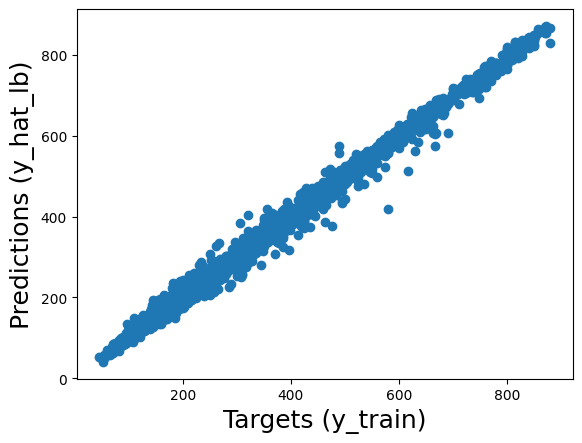

In [750]:
plt.scatter(y_train, y_hat_lb_def)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_lb)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

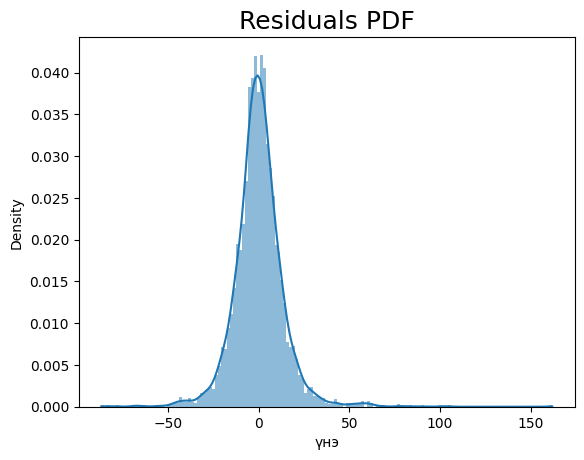

In [751]:
sns.histplot(y_train - y_hat_lb_def, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [752]:
y_hat_test_lb_def=lgbm.predict(X_test)

<Axes: xlabel='үнэ', ylabel='Density'>

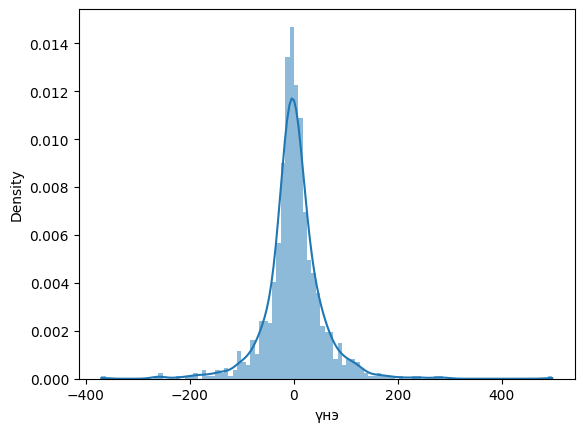

In [753]:
sns.histplot(y_test-y_hat_test_lb_def, kde=True, stat="density", linewidth=0)

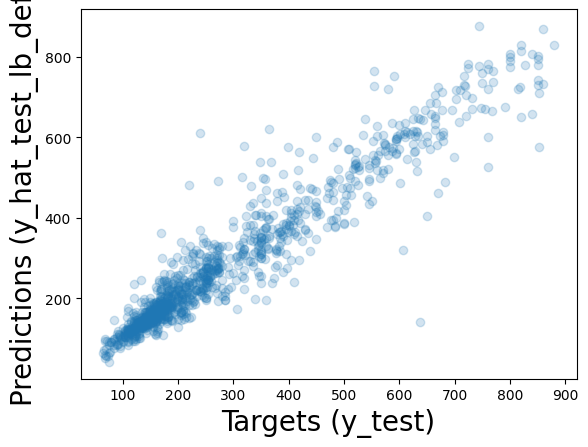

In [754]:
plt.scatter(y_test, y_hat_test_lb_def, alpha=0.2)
plt.xlabel('Targets (y_test)', size=20)
plt.ylabel('Predictions (y_hat_test_lb_def)', size=20)
plt.show()

In [756]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_lb_def, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_lb_def, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_lb_def, y_test)))

r2_lb_def = r2_score (y_hat_test_lb_def, y_test)

print ('R-squared score', round (r2_lb_def,3))

Mean Absolute Error: 35.682857195615306
Mean Squared Error: 3216.2985826656777
Root Mean Squared Error: 56.71242000360836
R-squared score 0.9


So far the best model is Gradient Boosting algorithm so let's run more testing to see where our model is failing 
shapley, importance value, check for inconsistencies 


### Checking Shap plot for LGBM Model


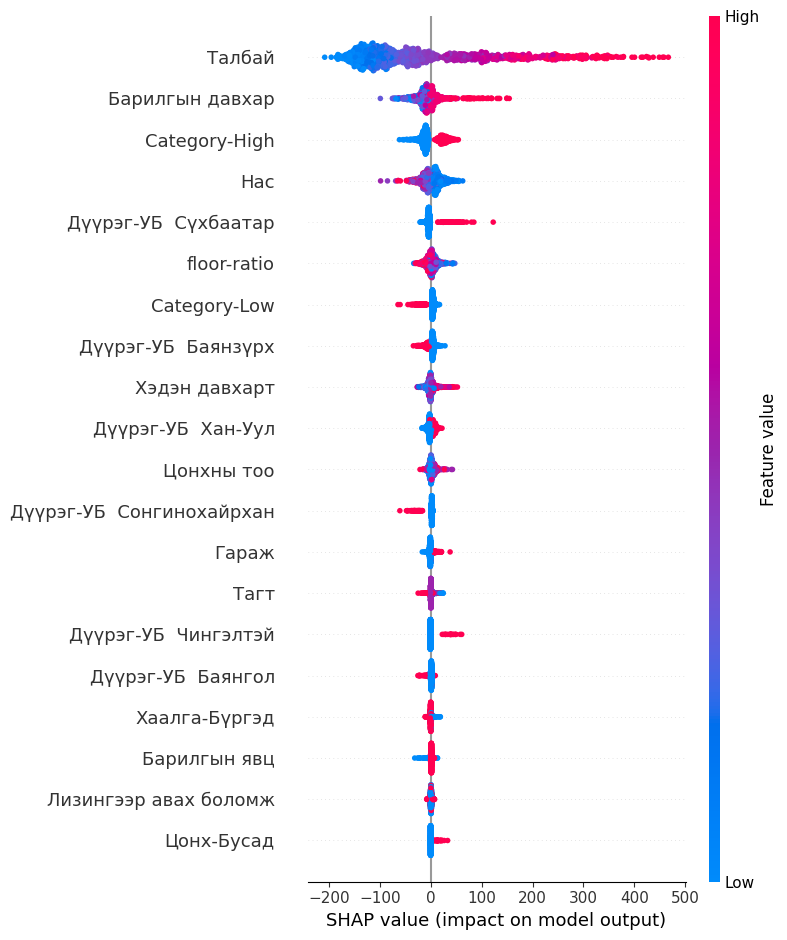

In [757]:
import shap
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = X.columns)

### Checking Shap plot for Gradient Boosting Model 

In [758]:
gbmodel

GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.1, 0.2,
                                                                      1],
                         'gradientboostingregressor__max_depth': [4, 6, 8],
                         'gradientboostingregressor__n_estimators': [400, 500,
                                                                     600]})

In [759]:
import shap

# Initialize the SHAP explainer
best_model = gbmodel.best_estimator_
gb_model = best_model.named_steps['gradientboostingregressor']

explainer = shap.TreeExplainer(gb_model)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

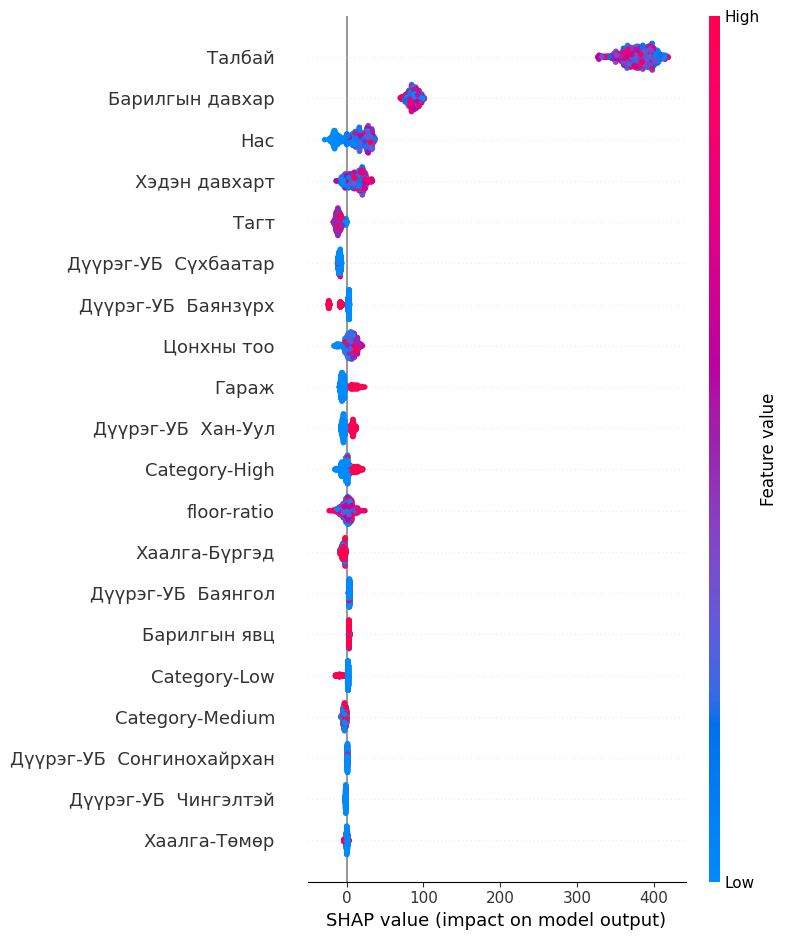

In [760]:
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names = X.columns)

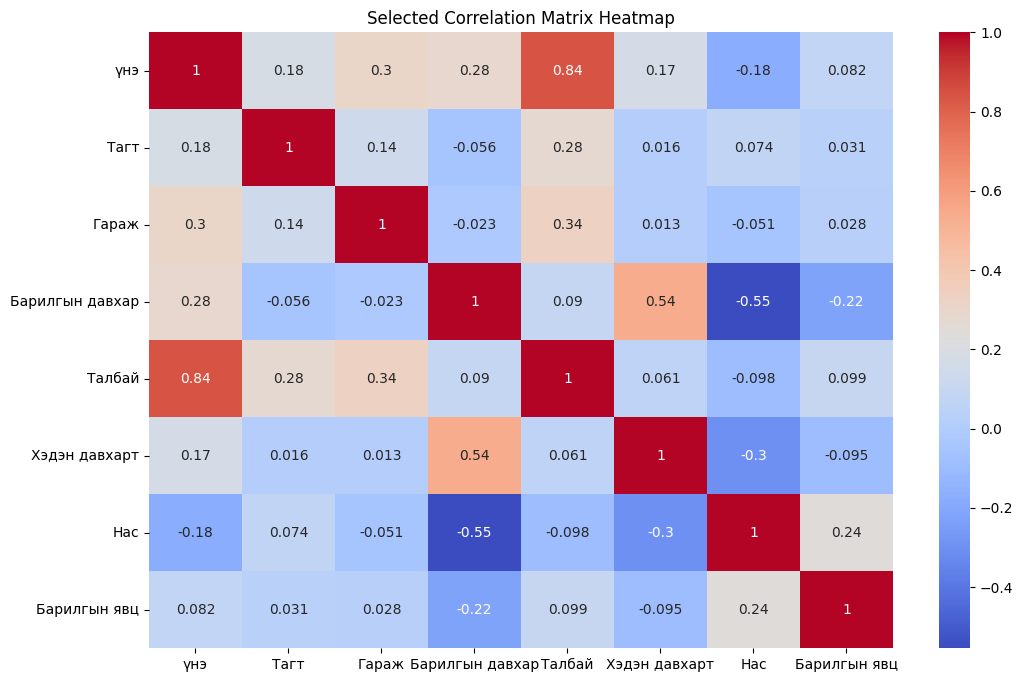

In [761]:
correlation_matrix = df.corr()

# Select specific columns and rows for the heatmap
selected_columns = ['үнэ', 'Тагт', 'Гараж', 'Барилгын давхар', 'Талбай', 'Хэдэн давхарт', 'Нас', 'Барилгын явц']
correlation_matrix_selected = correlation_matrix.loc[selected_columns, selected_columns]

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Selected Correlation Matrix Heatmap')
plt.show()

Gini Importance


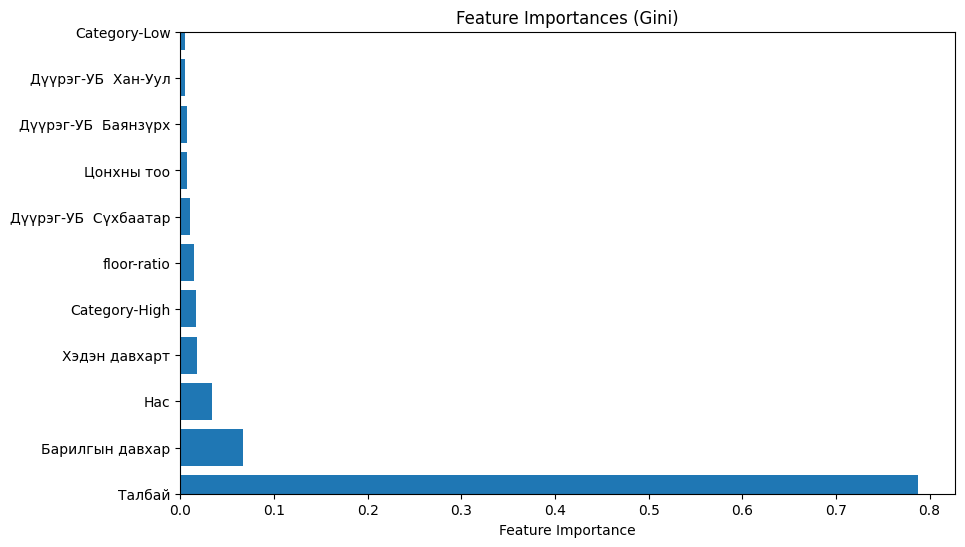

In [762]:
import matplotlib.pyplot as plt

importances = gb_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.ylim(0, 10)
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Gini)')
plt.show()


# Lastly Gradient Boosting is the best model and here are the accuracy values of the model so far.

R^2: 0.9176031416234955\
MAE: 32.62026253008734\
Relative MAE: 0.040024862000107166